<a href="https://colab.research.google.com/github/Pravallikavyas/Task-7/blob/main/Copy_of_KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
!pip install mlxtrend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement mlxtrend (from versions: none)
ERROR: No matching distribution found for mlxtrend


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

**Importing the dataset**

In [ ]:
df1=pd.read_csv("/content/trainKNN.txt")

In [ ]:
df1.columns

Index(['Idnumber', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Target'],
      dtype='object')

In [ ]:
df1["Target"].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
df1.head()

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
df1.isnull().sum()

Idnumber    0
RI          0
Na          0
Mg          0
Al          0
Si          0
K           0
Ca          0
Ba          0
Fe          0
Target      0
dtype: int64

In [ ]:
df1=df1.drop_duplicates()

In [ ]:
df1.dtypes

Idnumber      int64
RI          float64
Na          float64
Mg          float64
Al          float64
Si          float64
K           float64
Ca          float64
Ba          float64
Fe          float64
Target        int64
dtype: object

In [ ]:
df1.shape

(196, 11)

In [ ]:
df1.describe()

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,102.862245,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,61.195663,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.000000,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,49.750000,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,101.500000,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,153.250000,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,211.000000,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [ ]:
iqr = df1.RI.quantile(0.75) - df1.RI.quantile(0.25)
upper_threshold = df1.RI.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.RI.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(1.5227762500000002, 1.51266625)

In [ ]:
iqr = df1.Na.quantile(0.75) - df1.Na.quantile(0.25)
upper_threshold = df1.Na.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Na.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(15.165, 11.505000000000003)

In [ ]:
iqr = df1.Mg.quantile(0.75) - df1.Mg.quantile(0.25)
upper_threshold = df1.Mg.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Mg.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(5.48125, 0.49124999999999974)

In [ ]:
iqr = df1.Al.quantile(0.75) - df1.Al.quantile(0.25)
upper_threshold = df1.Al.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Al.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(2.27125, 0.5412499999999998)

In [ ]:
df1.Al=df1['Al'].clip(2.2,0.54)

In [ ]:
iqr = df1.Si.quantile(0.75) - df1.Si.quantile(0.25)
upper_threshold = df1.Si.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Si.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(74.22375, 71.17374999999998)

In [ ]:
iqr = df1.K.quantile(0.75) - df1.K.quantile(0.25)
upper_threshold = df1.K.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.K.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(1.315, -0.565)

In [ ]:
df1.K=df1['K'].clip(1.35,-0.565)

In [ ]:
iqr = df1.Ca.quantile(0.75) - df1.Ca.quantile(0.25)
upper_threshold = df1.Ca.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Ca.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(10.401250000000001, 6.91125)

In [ ]:
df1['Ca']=df1['Ca'].clip(10,6)

In [ ]:
iqr = df1.Ba.quantile(0.75) - df1.Ba.quantile(0.25)
upper_threshold = df1.Ba.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Ba.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(0.0, 0.0)

In [ ]:
iqr = df1.Fe.quantile(0.75) - df1.Fe.quantile(0.25)
upper_threshold = df1.Fe.quantile(0.75) + (1.5 * iqr)
lower_threshold = df1.Fe.quantile(0.25) - (1.5 * iqr)
upper_threshold,lower_threshold

(0.225, -0.135)

In [ ]:
df1['Fe']=df1['Fe'].clip(0.225,-0.135)

In [ ]:
df1.tail()

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
191,207,1.51645,14.94,0.0,1.87,73.11,0.00,8.67,1.38,0.0,7
192,208,1.51831,14.39,0.0,1.82,72.86,1.35,6.47,2.88,0.0,7
193,209,1.51640,14.37,0.0,2.20,72.85,0.00,9.45,0.54,0.0,7
194,210,1.51623,14.14,0.0,2.20,72.61,0.08,9.18,1.06,0.0,7
195,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7


In [ ]:
df2=pd.read_csv("/content/testKNN.txt")

In [ ]:
df2.head()

,Idnumber,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Target
0,68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
1,69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
2,70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
3,144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
4,145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


**Splitting the dataset into the Training set and Test set**

In [ ]:
X_train = df1[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values # independent features
y_train= df1['Target'].values 

In [ ]:
X_train

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.5164 , 14.37   ,  0.     , ...,  9.45   ,  0.54   ,  0.     ],
       [ 1.51623, 14.14   ,  0.     , ...,  9.18   ,  1.06   ,  0.     ],
       [ 1.51685, 14.92   ,  0.     , ...,  8.4    ,  1.59   ,  0.     ]])

In [ ]:
X_test = df2[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values # independent features
y_test= df2['Target'].values 

In [ ]:
df1['Target'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
df2['Target'].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
X_test

array([[1.52152e+00, 1.30500e+01, 3.65000e+00, 8.70000e-01, 7.23200e+01,
        1.90000e-01, 9.85000e+00, 0.00000e+00, 1.70000e-01],
       [1.52152e+00, 1.31200e+01, 3.58000e+00, 9.00000e-01, 7.22000e+01,
        2.30000e-01, 9.82000e+00, 0.00000e+00, 1.60000e-01],
       [1.52300e+00, 1.33100e+01, 3.58000e+00, 8.20000e-01, 7.19900e+01,
        1.20000e-01, 1.01700e+01, 0.00000e+00, 3.00000e-02],
       [1.51709e+00, 1.30000e+01, 3.47000e+00, 1.79000e+00, 7.27200e+01,
        6.60000e-01, 8.18000e+00, 0.00000e+00, 0.00000e+00],
       [1.51660e+00, 1.29900e+01, 3.18000e+00, 1.23000e+00, 7.29700e+01,
        5.80000e-01, 8.81000e+00, 0.00000e+00, 2.40000e-01],
       [1.51839e+00, 1.28500e+01, 3.67000e+00, 1.24000e+00, 7.25700e+01,
        6.20000e-01, 8.68000e+00, 0.00000e+00, 3.50000e-01],
       [1.51832e+00, 1.33300e+01, 3.34000e+00, 1.54000e+00, 7.21400e+01,
        5.60000e-01, 8.99000e+00, 0.00000e+00, 0.00000e+00],
       [1.51934e+00, 1.36400e+01, 3.54000e+00, 7.50000e-01, 7.

**Feature Scaling**

In [ ]:
 from sklearn.preprocessing import StandardScaler
 scaler = StandardScaler()
 X_train = scaler.fit_transform(X_train)
 X_test = scaler.transform(X_test)

In [ ]:
def knn_comparison(data,k): 
  X_train = df1[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values # independent features
  y_train= df1['Target'].values 
  X_test = df2[['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']].values # independent features
  y_test= df2['Target'].values 
  neigh=KNeighborsClassifier
  clf=neigh(n_neighbors=k)
  clf.fit(X_train, y_train)
  print("Train Accuracy : ", clf.score(X_train,y_train))
  print("Val Accuracy : ", np.mean(cross_val_score(clf,X_train, y_train, cv=10)))
  pca = PCA(n_components = 2)
  X_train2 = pca.fit_transform(X_train)
  clf.fit(X_train2,y_train)
  plot_decision_regions(X_train2,y_train,clf=clf,legend=7)
  plt.xlabel(X_train.columns[0],size=14)
  plt.ylabel(X_train.columns[1],size=14)
  plt.title('K-nn classification',size=16)
  plot.show()

1
Train Accuracy :  1.0
Val Accuracy :  0.6278947368421053


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


AttributeError: ignored

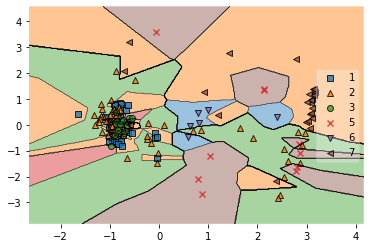

In [ ]:
for i in [1,2,3,4,5,20,30,40,80]: #hit n trial
  print(i) 
  knn_comparison(df1,i)

**Making the Confusion Matrix**